<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Sampling_and_quantification_of_digital_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean, resize
from skimage import img_as_uint
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Processing Overview

Analog images, which are continuous in nature, can be found in traditional media such as film and newspapers. On the other hand, digital images, which are composed of discrete pixels, lend themselves to the realm of digital processing and manipulation. By exploring image processing techniques, we can enhance the viewing experience and uncover hidden insights within these digital images.

## Analog Image

In [ ]:
def show_image(image_path, digital_img=False):
    # Load the image
    image = imread(image_path)

    # Display the image
    plt.figure(figsize=(15,10))
    plt.imshow(image)
    if digital_img:
      plt.title("Ejemplo de una imagen analógica")
    else:
      plt.title("Ejemplo de una imagen digital")
    plt.axis('off')
    plt.show()

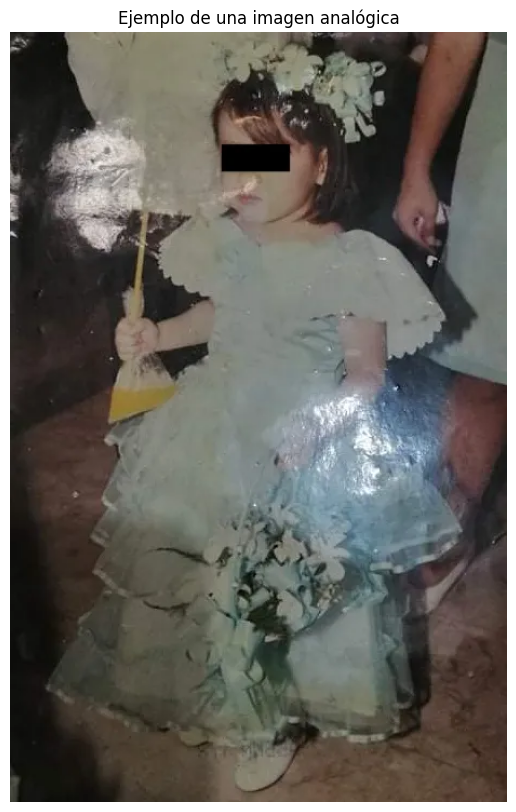

In [ ]:
# Display analog image
img_nina = '/content/drive/MyDrive/nina.png'
show_image(img_nina, True)

## Digital Image

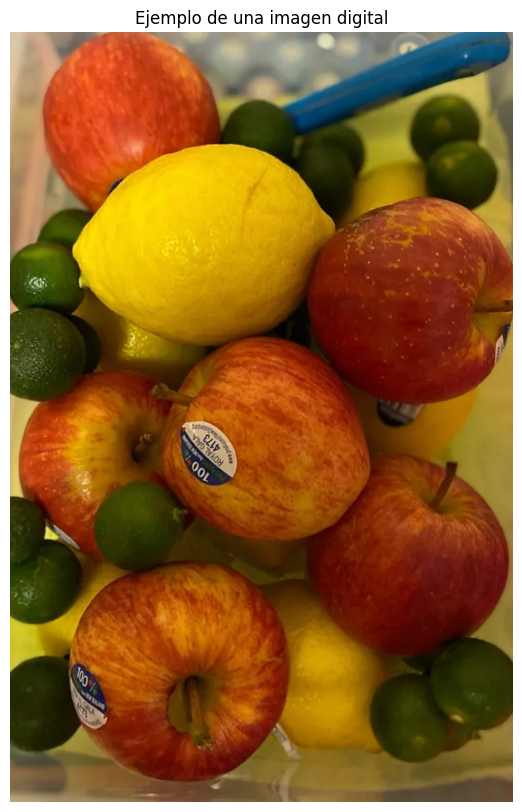

In [ ]:
# Display digital image
img_frutas = '/content/drive/MyDrive/frutas.jpeg'
show_image(img_frutas)

# Image Digitalization

## Upsampling

Oversampling is a technique that adds additional pixels between existing ones, determining **the new pixel values ​​based on neighboring pixels**. It is commonly used to improve the level of detail and sharpness of an image.

In [ ]:
def upsample_image(image_path, factor=2):
    """Takes in the image path and the upsample factor to return 5
    upsampled images together with the original image.
    """
    # Load the original image
    img = imread(image_path)

    # Upsample the image by a factor of `factor`, default `factor`=2
    factors = factor**np.arange(0, 5)

    # Create a subplot for each upsampled image
    fig, ax = plt.subplots(1, len(factors)+1, figsize=(25, 20))

    # Display the original image
    ax[0].imshow(img)
    ax[0].set_title(r'Original $N=%d$' % img.shape[0])

    # Loop over each upsampling factor and upsample the image
    for i, factor in enumerate(factors):
        # Upsample the image using the current factor
        image = resize(img, (img.shape[0]*factor, img.shape[1]*factor),
                       anti_aliasing=True)

        # Determine the axis number for this subplot
        ax_num = i + 1

        # Display the upsampled image on the corresponding subplot
        ax[ax_num].imshow(image)

        # Set the subplot title to the size of the upsampled image
        ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

    # Adjust the layout of the subplots to prevent overlap
    plt.tight_layout()

    # Show the final plot
    plt.show()

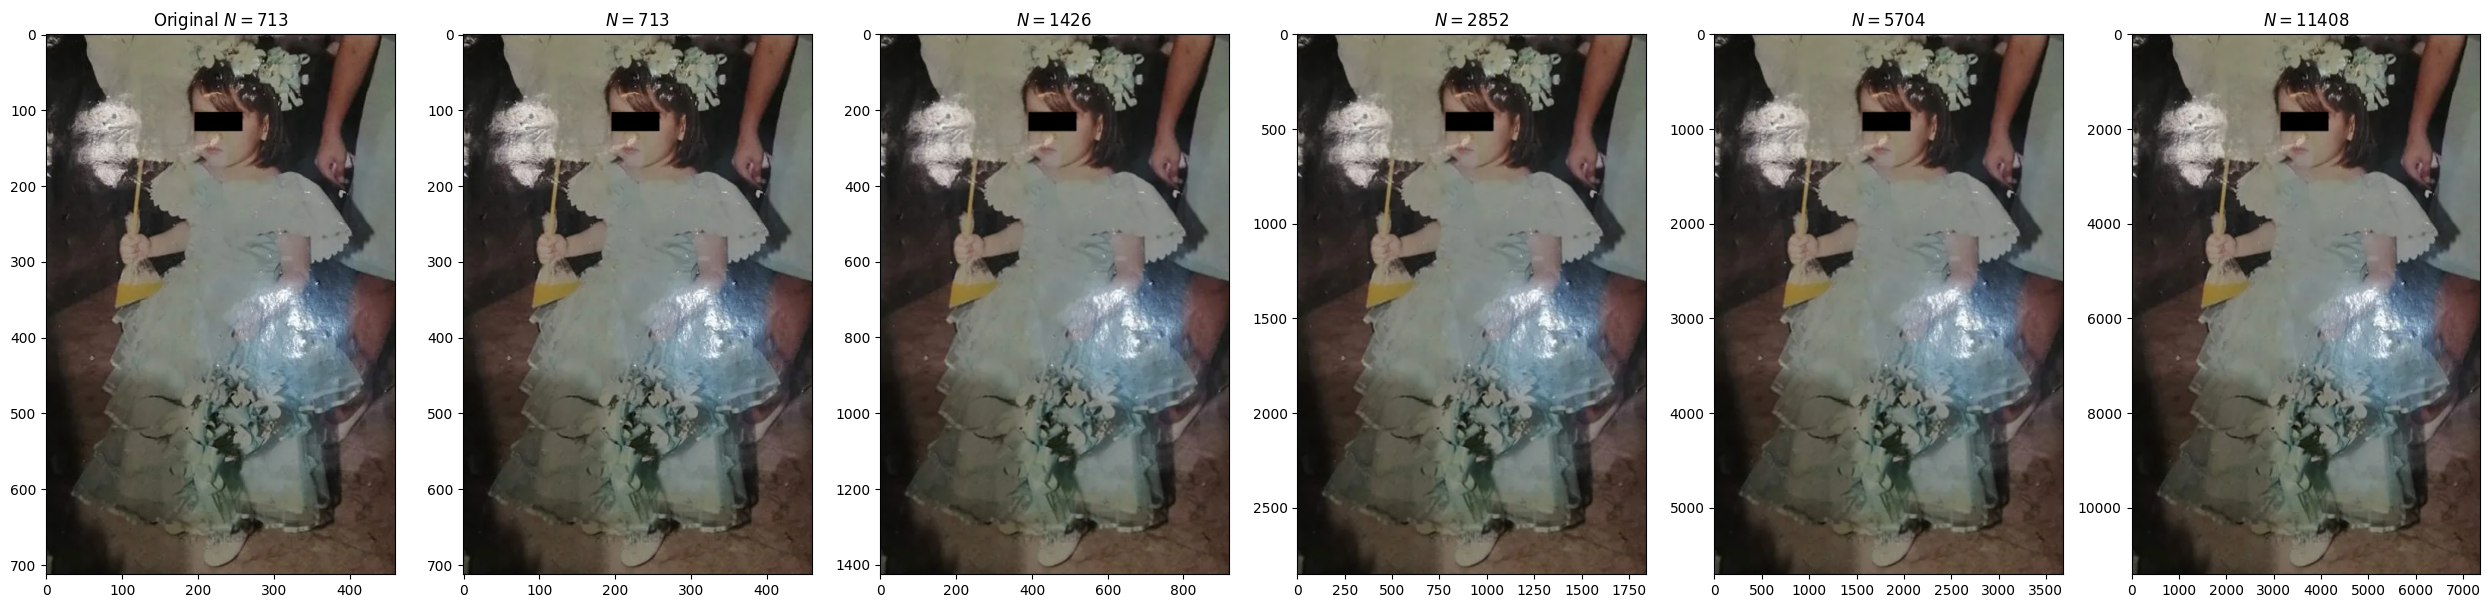

In [ ]:
# Upsample an image
upsample_image(img_nina)

In the above code, the image was upsampled by a factor of 2 for each iteration of the loop using the `resize()` function. Despite the increase in the number of pixels, the improvement in the image was not significant.

It is important to note that upsampling can introduce noise and artifacts, so it is recommended to increase sampling moderately.

Despite this, oversampling can be a useful technique for image processing tasks such as **image interpolation**, **image super-resolution**, and **image quality enhancement**.

## Downsampling

As we reduce the original image to smaller and smaller sizes, we inevitably lose some of its finer details and features.

Using downsampling, I can reduce computational complexity and improve storage and transmission efficiency: the smaller the number of pixels, the faster the processing time, the lower the computational requirements and less storage space required. This allows images to be transmitted more quickly over networks, which is crucial for applications with limited bandwidth or storage capacity.

In [ ]:
def downsample_image(image_path, factor=2):
    """Takes in the image path and the downsample factor to return 5
    downsampled images together with the original image.
    """
    # Load the original image
    img = imread(image_path)

    # Sample the image by a factor
    factors = factor**np.arange(0, 5)

    # Create a subplot for each sampled image
    fig, ax = plt.subplots(1, len(factors)+1, figsize=(25, 20))

    # Display the original image
    ax[0].imshow(img)
    ax[0].set_title(r'Original $N=%d$' % img.shape[0])

    # Loop over each sampling factor and sample the image
    for i, factor in enumerate(factors):
        # Sample the image using the current factor
        image = downscale_local_mean(img,
                                     factors=(factor,
                                              factor,
                                              1)).astype(int)

        # Determine the axis number for this subplot
        ax_num = len(factors) - i

        # Display the sampled image on the corresponding subplot
        ax[ax_num].imshow(image)

        # Set the subplot title to the size of the sampled image
        ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

    # Adjust the layout of the subplots to prevent overlap
    plt.tight_layout()

    # Show the final plot
    plt.show()

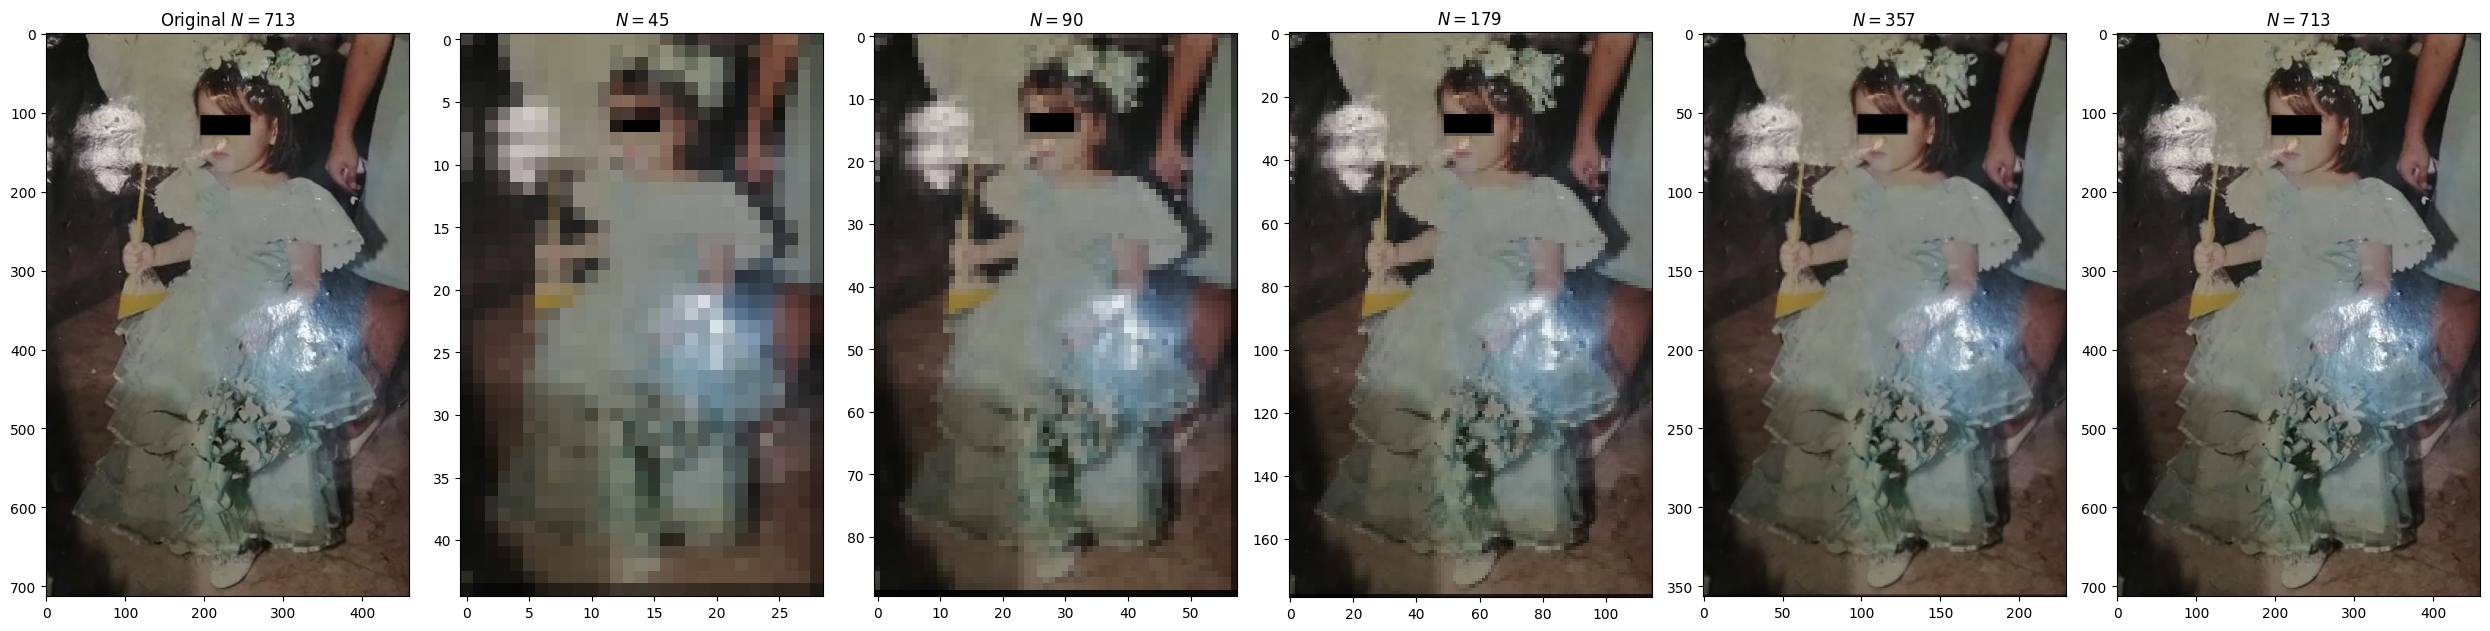

In [ ]:
# Downsample an image
downsample_image(img_nina)

# Image quantization

In [ ]:
def quantize_image(image_path, k_values):
    """
    Perform quantization on an image using different values of k.

    Parameters:
        image_path (str): The path to the image file.
        k_values (list): A list of k values to be used for quantization.
    """
    # Load the original image
    img = imread(image_path)

    # Create subplots for different k values
    fig, ax = plt.subplots(1, len(k_values), figsize=(25, 20))

    for i, k in enumerate(k_values):
        # Create k bins of equal width between 0 and the maximum intensity value
        bins = np.linspace(0, img.max(), k)

        # Map the pixel values of the original image to the nearest bin
        quantized_image = np.digitize(img, bins)

        # Convert the binned values back to the original range of intensity values
        reconstructed_image = (np.vectorize(bins
                                            .tolist()
                                            .__getitem__)(quantized_image-1)
                                 .astype(int))

        # Display the quantized image with title showing the number of bins (k)
        ax[i].imshow(reconstructed_image)
        ax[i].set_title(r'$k = %d$' % k)

    # Adjust the layout of the subplots to prevent overlap
    plt.tight_layout()

    # Show the final plot
    plt.show()

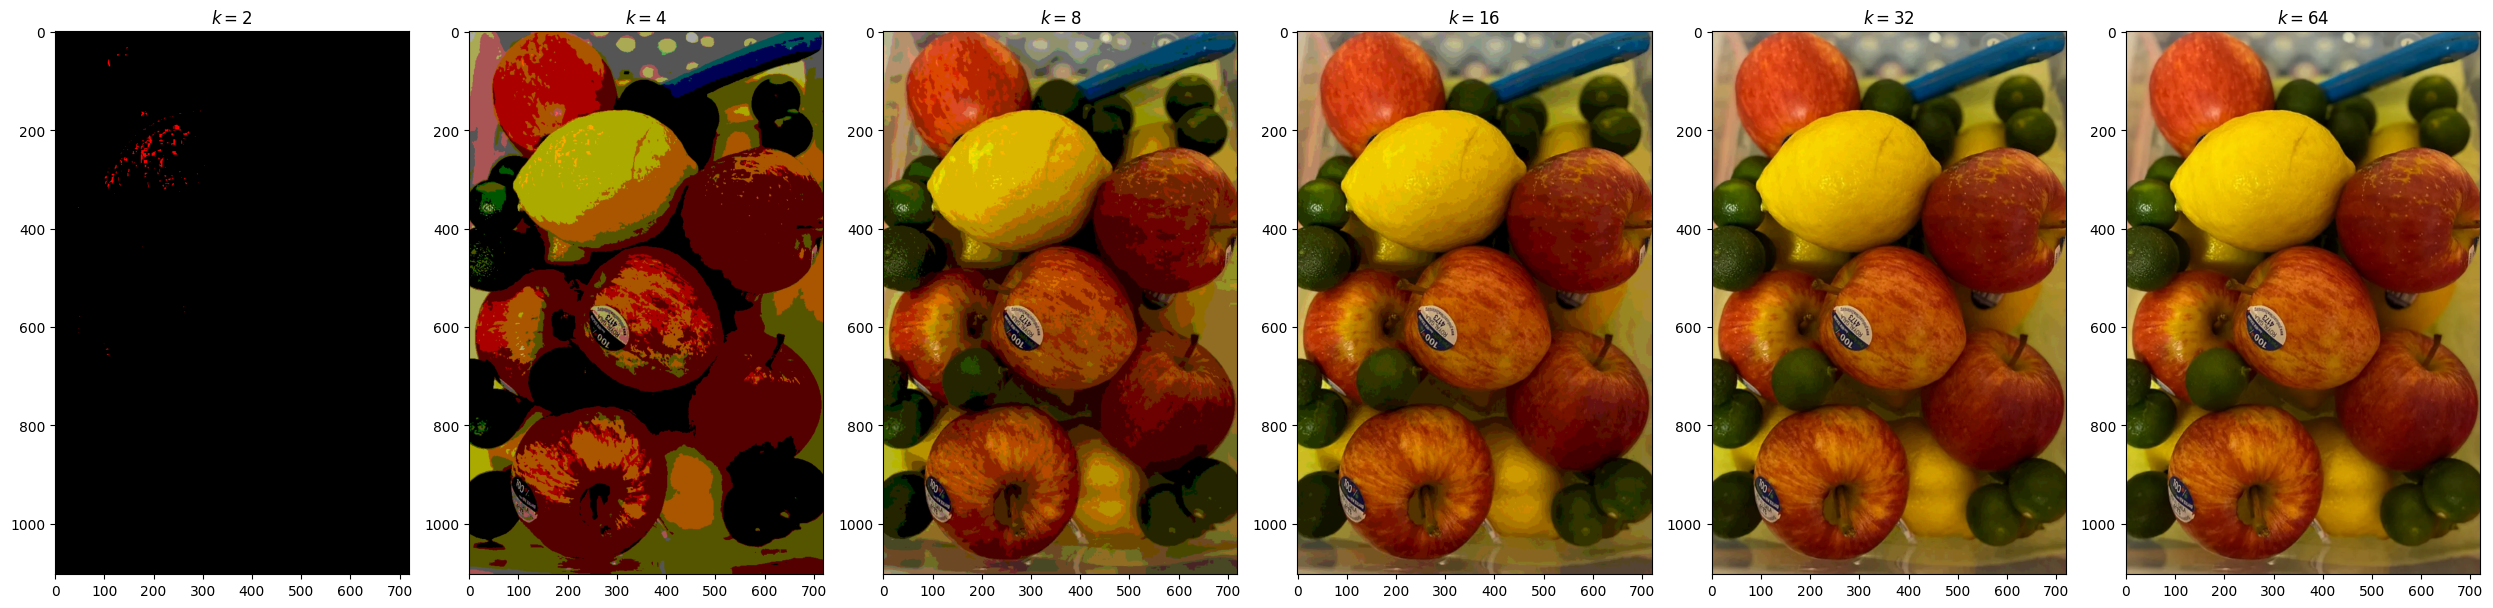

In [ ]:
# Quantize the image
k_values = [2,  4,  8, 16, 32, 64]
quantize_image(img_frutas, k_values)